In [16]:
import pandas as pd
from tqdm.auto import tqdm
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn import metrics
import numpy.matlib
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.express as px
import math
tqdm.pandas()

In [17]:
df = pd.read_csv('./dataset/2020-02-road-2-in.csv',parse_dates=["datetime"])
df = df.drop(['all_units','samecell_units','max_speed','avg_traveltime','max_traveltime'],axis=1)
df

,datetime,road_number,km,direction,inflow_units,outflow_unit,avg_speed
0,2020-02-01 00:00:34,2,1,in,1,2,54
1,2020-02-01 00:00:34,2,2,in,0,1,0
2,2020-02-01 00:00:34,2,3,in,2,0,64
3,2020-02-01 00:00:34,2,4,in,2,2,80
4,2020-02-01 00:00:34,2,5,in,2,0,50
...,...,...,...,...,...,...,...
16496944,2020-02-29 23:59:14,2,468,in,1,0,44
16496945,2020-02-29 23:59:14,2,488,in,0,1,0
16496946,2020-02-29 23:59:14,2,489,in,1,1,56
16496947,2020-02-29 23:59:14,2,490,in,2,1,64


In [18]:
df['inflow_units_N'] = (df["inflow_units"] - df["inflow_units"].min()) / (df["inflow_units"].max() - df["inflow_units"].min())
df['outflow_units_N'] = (df["outflow_unit"] - df["outflow_unit"].min()) / (df["outflow_unit"].max() - df["outflow_unit"].min())
df['avg_speed_N'] = (df["avg_speed"] - df["avg_speed"].min()) / (df["avg_speed"].max() - df["avg_speed"].min())
df

,datetime,road_number,km,direction,inflow_units,outflow_unit,avg_speed,inflow_units_N,outflow_units_N,avg_speed_N
0,2020-02-01 00:00:34,2,1,in,1,2,54,0.04,0.076923,0.6750
1,2020-02-01 00:00:34,2,2,in,0,1,0,0.00,0.038462,0.0000
2,2020-02-01 00:00:34,2,3,in,2,0,64,0.08,0.000000,0.8000
3,2020-02-01 00:00:34,2,4,in,2,2,80,0.08,0.076923,1.0000
4,2020-02-01 00:00:34,2,5,in,2,0,50,0.08,0.000000,0.6250
...,...,...,...,...,...,...,...,...,...,...
16496944,2020-02-29 23:59:14,2,468,in,1,0,44,0.04,0.000000,0.5500
16496945,2020-02-29 23:59:14,2,488,in,0,1,0,0.00,0.038462,0.0000
16496946,2020-02-29 23:59:14,2,489,in,1,1,56,0.04,0.038462,0.7000
16496947,2020-02-29 23:59:14,2,490,in,2,1,64,0.08,0.038462,0.8000


In [19]:
# sns.pairplot(df,vars=['inflow_units_N','outflow_units_N','avg_speed_N'],hue="cluster")

In [20]:
# fig = px.scatter_matrix(df.drop(["datetime","road_number","km","direction","inflow_units","outflow_unit","avg_speed"],axis=1),width=600, height=1000)
# fig.show()

In [21]:
df.max(axis=0)

datetime           2020-02-29 23:59:14
road_number                          2
km                                 508
direction                           in
inflow_units                        25
outflow_unit                        26
avg_speed                           80
inflow_units_N                     1.0
outflow_units_N                    1.0
avg_speed_N                        1.0
dtype: object

In [22]:
X = df[['inflow_units_N','outflow_units_N','avg_speed_N']].values
X

array([[0.04      , 0.07692308, 0.675     ],
       [0.        , 0.03846154, 0.        ],
       [0.08      , 0.        , 0.8       ],
       ...,
       [0.04      , 0.03846154, 0.7       ],
       [0.08      , 0.03846154, 0.8       ],
       [0.        , 0.        , 0.6125    ]])

In [23]:
# WCSS = []
# for i in range(1,11):
#     model = KMeans(n_clusters = i,init = 'k-means++')
#     model.fit(X)
#     WCSS.append(model.inertia_)
# fig = plt.figure(figsize = (7,7))
# plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'blue')
# plt.xticks(np.arange(11))
# plt.xlabel("Number of clusters")
# plt.ylabel("WCSS")
# plt.show()

In [24]:
model = KMeans(n_clusters = 5,init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(X)
df['cluster'] = y_clusters

C:\Users\NITIKORN\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:ylabel='count'>

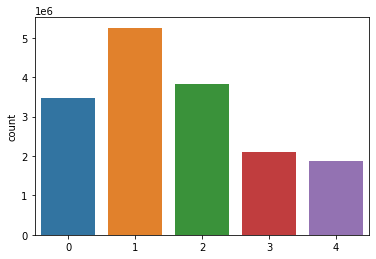

In [25]:
sns.countplot(y_clusters)

In [26]:
print(X[y_clusters == 0,0][0])
print(X[y_clusters == 0,1][0])
print(X[y_clusters == 0,2][0])

0.0
0.038461538461538464
0.0


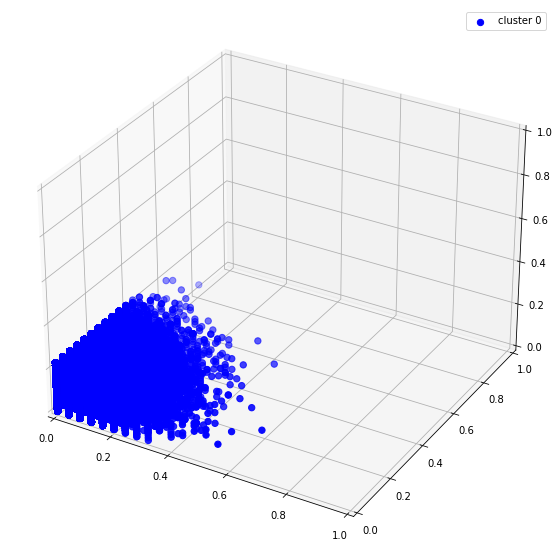

In [27]:
fig1 = plt.figure(figsize = (10,10))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(X[y_clusters == 0,0],X[y_clusters == 0,1],X[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax1.set_xlim3d(0,1)
ax1.set_ylim3d(0,1)
ax1.set_zlim3d(0,1)
ax1.legend()
plt.show()

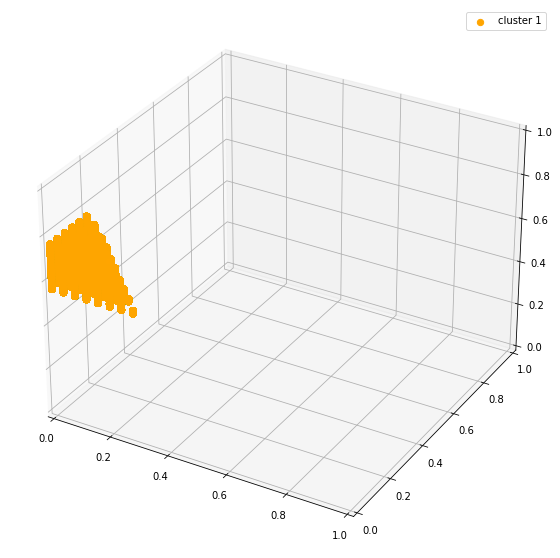

In [28]:
fig2 = plt.figure(figsize = (10,10))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(X[y_clusters == 1,0],X[y_clusters == 1,1],X[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax2.set_xlim3d(0,1)
ax2.set_ylim3d(0,1)
ax2.set_zlim3d(0,1)
ax2.legend()
plt.show()

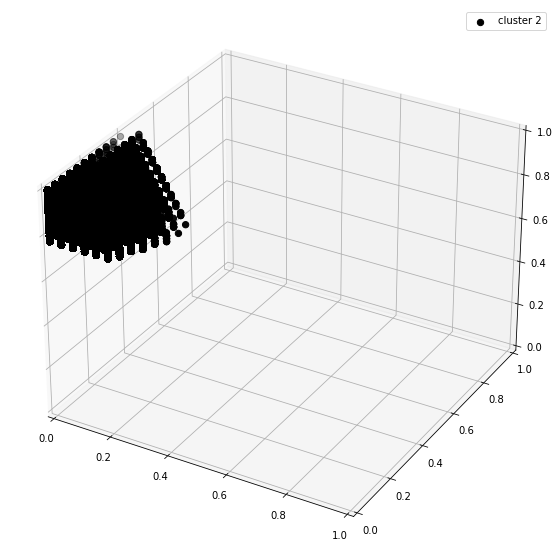

In [29]:
fig3 = plt.figure(figsize = (10,10))
ax3 = fig3.add_subplot(111, projection='3d')
ax3.scatter(X[y_clusters == 2,0],X[y_clusters == 2,1],X[y_clusters == 2,2], s = 40 , color = 'black', label = "cluster 2")
ax3.set_xlim3d(0,1)
ax3.set_ylim3d(0,1)
ax3.set_zlim3d(0,1)
ax3.legend()
plt.show()

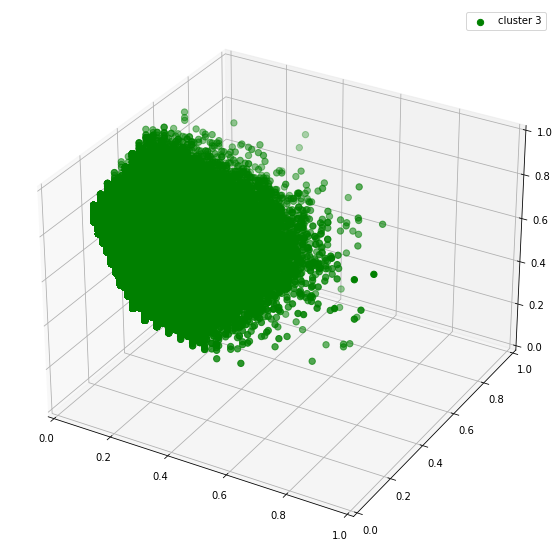

In [30]:
fig4 = plt.figure(figsize = (10,10))
ax4 = fig4.add_subplot(111, projection='3d')
ax4.scatter(X[y_clusters == 3,0],X[y_clusters == 3,1],X[y_clusters == 3,2], s = 40 , color = 'green', label = "cluster 3")
ax4.set_xlim3d(0,1)
ax4.set_ylim3d(0,1)
ax4.set_zlim3d(0,1)
ax4.legend()
plt.show()

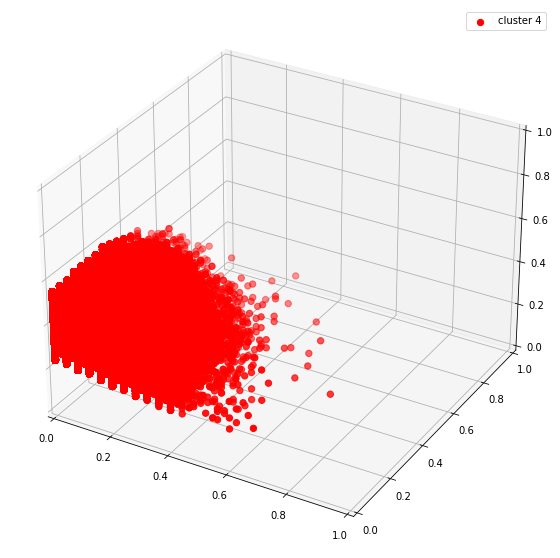

In [31]:
fig5 = plt.figure(figsize = (10,10))
ax5 = fig5.add_subplot(111, projection='3d')
ax5.scatter(X[y_clusters == 4,0],X[y_clusters == 4,1],X[y_clusters == 4,2], s = 40 , color = 'red', label = "cluster 4")
ax5.set_xlim3d(0,1)
ax5.set_ylim3d(0,1)
ax5.set_zlim3d(0,1)
ax5.legend()
plt.show()

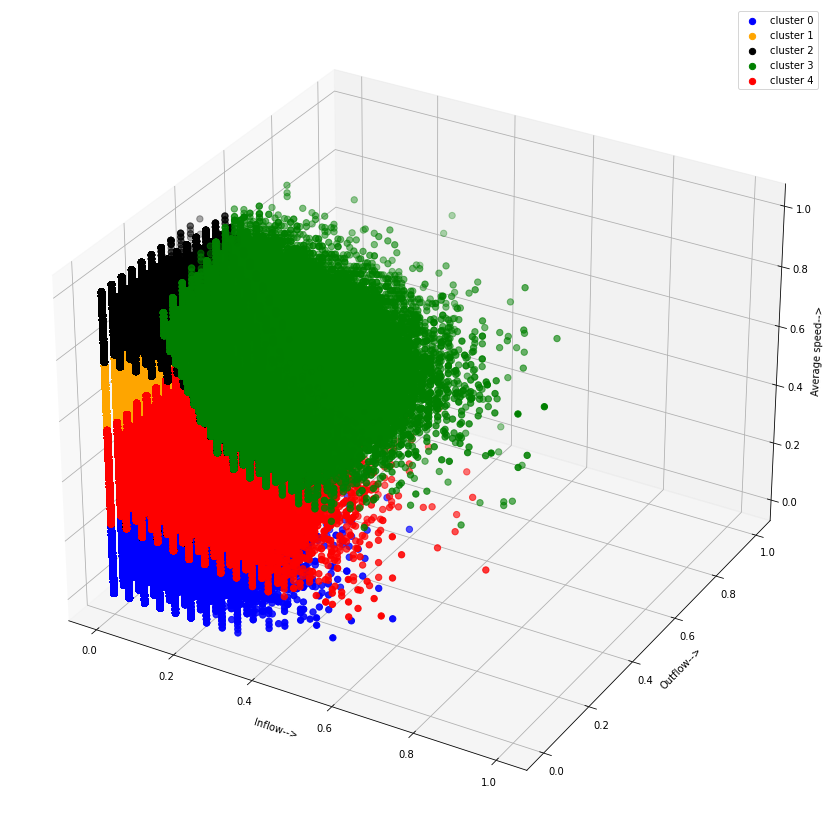

In [32]:
fig6 = plt.figure(figsize = (15,15))
ax6 = fig6.add_subplot(111, projection='3d')
ax6.scatter(X[y_clusters == 0,0],X[y_clusters == 0,1],X[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax6.scatter(X[y_clusters == 1,0],X[y_clusters == 1,1],X[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax6.scatter(X[y_clusters == 2,0],X[y_clusters == 2,1],X[y_clusters == 2,2], s = 40 , color = 'black', label = "cluster 2")
ax6.scatter(X[y_clusters == 3,0],X[y_clusters == 3,1],X[y_clusters == 3,2], s = 40 , color = 'green', label = "cluster 3")
ax6.scatter(X[y_clusters == 4,0],X[y_clusters == 4,1],X[y_clusters == 4,2], s = 40 , color = 'red', label = "cluster 4")
# ax.scatter(X[y_clusters == 5,0],X[y_clusters == 5,1],X[y_clusters == 5,2], s = 40 , color = 'cyan', label = "cluster 5")
# ax.scatter(X[y_clusters == 6,0],X[y_clusters == 6,1],X[y_clusters == 6,2], s = 40 , color = 'yellow', label = "cluster 6")
ax6.set_xlabel('Inflow-->')
ax6.set_ylabel('Outflow-->')
ax6.set_zlabel('Average speed-->')
ax6.legend()
plt.show()